In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df.shape

(100, 4)

Steps
0. Preprocess + EDA + Feature Selection
1. Extract  input and output cols
2. Scale the values
3. Train test split
4. Train the model
5. Evalute the model/model selection
6. Deploy the model

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

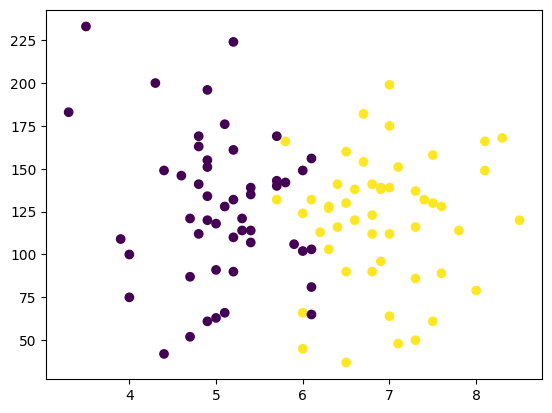

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [ ]:
y.shape

(100,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [ ]:
X_train

,cgpa,iq
60,6.9,139.0
77,7.3,50.0
89,4.9,151.0
95,4.3,200.0
2,5.3,121.0
...,...,...
16,5.2,224.0
90,7.3,86.0
75,4.8,169.0
52,7.0,175.0


In [ ]:
y_train

,placement
60,1
77,1
89,0
95,0
2,0
...,...
16,0
90,1
75,0
52,1


In [ ]:
X_test

,cgpa,iq
11,6.9,138.0
22,4.9,120.0
10,6.0,45.0
39,4.6,146.0
34,4.8,163.0
9,5.1,66.0
26,7.0,199.0
79,6.5,90.0
81,5.4,107.0
83,7.5,130.0


In [ ]:
y_test

,placement
11,1
22,0
10,1
39,0
34,0
9,0
26,1
79,1
81,0
83,1


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[ 7.77525886e-01,  3.83315769e-01],
       [ 1.12480792e+00, -1.88096101e+00],
       [-9.58884281e-01,  6.88611515e-01],
       [-1.47980733e+00,  1.93523581e+00],
       [-6.11602248e-01, -7.46278489e-02],
       [-1.74026886e+00, -6.08895404e-01],
       [-9.58884281e-01,  2.56109209e-01],
       [ 1.99301300e+00,  1.12111382e+00],
       [ 1.38526944e+00,  1.03461336e-01],
       [ 2.56602836e-01,  7.80200238e-02],
       [ 8.64346394e-01, -3.03599658e-01],
       [-8.72063773e-01, -8.37867213e-01],
       [ 5.17064361e-01, -1.00069161e-01],
       [ 1.69782327e-01, -2.78158346e-01],
       [ 8.29618191e-02,  2.05226584e-01],
       [-8.72063773e-01, -1.50951785e-01],
       [-1.39298682e+00,  6.37728891e-01],
       [-6.11602248e-01, -2.52717034e-01],
       [-5.24781740e-01,  2.81550521e-01],
       [ 6.03884869e-01,  7.64935451e-01],
       [ 8.29618191e-02,  8.15818075e-01],
       [-2.64320214e-01,  2.05226584e-01],
       [ 6.90705378e-01, -2.37452246e-02],
       [-1.

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[ 0.77752589,  0.35787446],
       [-0.95888428, -0.10006916],
       [-0.00385869, -2.00816757],
       [-1.21934581,  0.56140495],
       [-1.04570479,  0.99390726],
       [-0.78524326, -1.47390002],
       [ 0.86434639,  1.9097945 ],
       [ 0.43024385, -0.86330852],
       [-0.52478174, -0.43080622],
       [ 1.29844894,  0.15434396]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
#model training
clf.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_test

,placement
11,1
22,0
10,1
39,0
34,0
9,0
26,1
79,1
81,0
83,1


In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.9

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

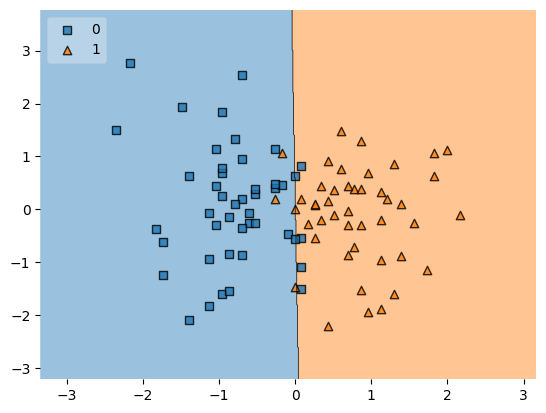

In [ ]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('model.pkl','wb'))